In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# 1. Read the dataset to python environment

In [2]:
#LOAD THE DATA SHEET TO PYTHON ENVIRONMENT
data = pd.read_excel("iris (1).xls")

In [3]:
#DISPLAY THE COLUMNS IN THE DATASET
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### This data set consists of the physical parameters of three species of  Iris flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. 

In [4]:
#PRINT THE FIRST 5 LINES OF THE IRIS DATASET
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#PRINT THE LAST 5 LINES OF THE IRIS DATASET
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# DISPALY THE COLUMN LABELS OF IRIS DATASET
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
#SHAPE OF THE DATASET 
data.shape

(150, 5)

In [8]:
# TOTAL NUMBER OF NULL VALUES IN EACH FEATURES IN THE DATAFRAME. 
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#DISPLAY THE FULL SUMMARY OF THE DATAFRAME.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#STATISTICS SUMMARY OF THE GIVEN DATAFRAME.
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do the necessary pre-processing steps.

### FILLING MISSING VALUES

In [11]:
# Check datatypes
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

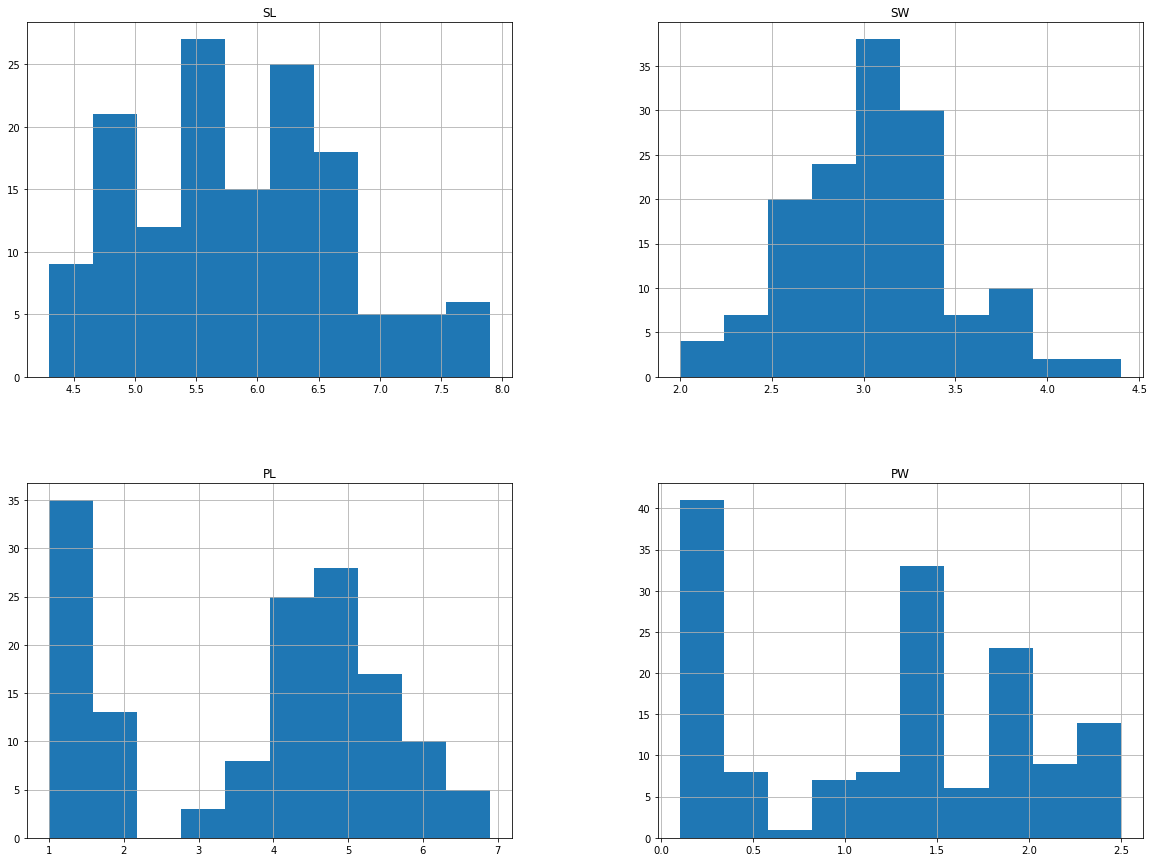

In [12]:
freqgraph = data.select_dtypes(include = ['float'])
freqgraph.hist(figsize =(20,15))
plt.show()

In [13]:
# Here the data is symmetric so we can replace the missing values with median.

In [14]:
# Filling the missing values.

In [15]:
for i in [ 'SL', 'SW', 'PL'] :     
     data[i]= data[i].fillna(data[i].mean())

In [16]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [17]:
# Number of rows that belongs to each class
data.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

C:\Users\athir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


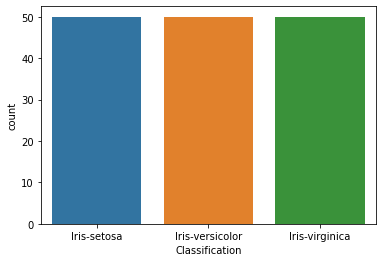

In [18]:
sns.countplot(data['Classification'])
plt.show()

###### We have 150 rows in which 50 belong to Iris-setosa, 50 belong to Iris-Versicolor, and the remaining 50 belong to Iris_virginica.

In [19]:
data["Classification"].value_counts(normalize = " True")

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

### MANAGING OUTLIERS

Text(0.5, 1.0, ' Box Plot Of SL Column')

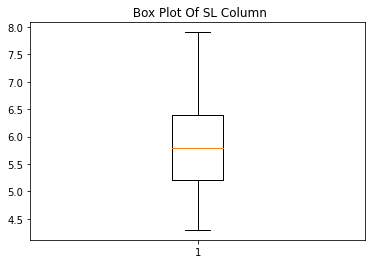

In [20]:
plt.boxplot(data["SL"])
plt.title(" Box Plot Of SL Column")

#### From the box plot above, we cannot see any data above or below. Therefore, there is no outliers in this column.ie, All the values falls within the range.

Text(0.5, 1.0, ' Box Plot Of SW Column')

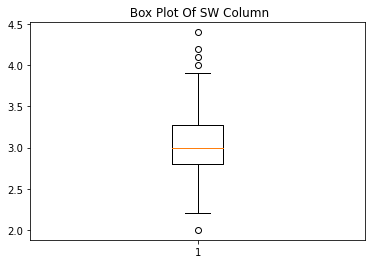

In [21]:
plt.boxplot(data["SW"])
plt.title(" Box Plot Of SW Column")

#### From the box plot above , we can see that some circle lying above the upperlimit and below the lowerlimit. This may not indicate that all of these are outliers.Inorder to check , proceed with the below steps.

In [22]:
Q1 = np.percentile(data['SW'],25, interpolation ='midpoint')

Q2 = np.percentile(data['SW'],50, interpolation ='midpoint')

Q3 = np.percentile(data['SW'],75, interpolation ='midpoint')

print(Q1)

print(Q2)

print(Q3)


2.8
3.0
3.25


In [23]:
data['SW'].median()

3.0

In [24]:
IQR = Q3 - Q1
print(IQR)

0.4500000000000002


In [25]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [26]:
outlier =[]

for x in data ["SW"]:
  if((x > up_lim) or(x < low_lim)):
    outlier.append(x)

In [27]:
# Identification of Outliers

outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [28]:
# the outlier index values

ind = ( (data["SW"]>up_lim) |  (data["SW"]<low_lim))

In [29]:
data.loc[ind].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

Text(0.5, 1.0, ' Box Plot Of PL Column')

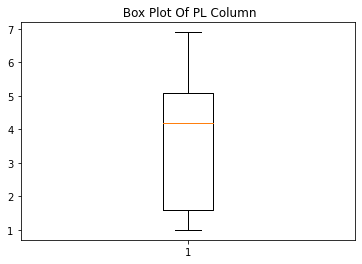

In [30]:
plt.boxplot(data["PL"])
plt.title(" Box Plot Of PL Column")

#### From the box plot above, we cannot see any data above or below. Therefore, there is no outliers in this column.ie, All the values falls within the range.

Text(0.5, 1.0, ' Box Plot Of PW Column')

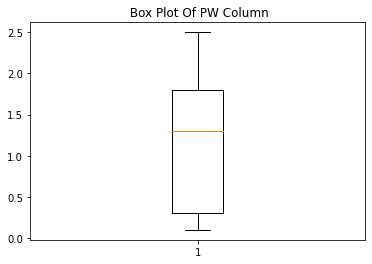

In [31]:
plt.boxplot(data["PW"])
plt.title(" Box Plot Of PW Column")

#### From the box plot above, we cannot see any data above or below. Therefore, there is no outliers in this column.ie, All the values falls within the range.

In [32]:
# the number of all unique values of Classification column.
data.Classification.nunique()

3

In [33]:
# unique values of Classification column in the form of an array .
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

<AxesSubplot:>

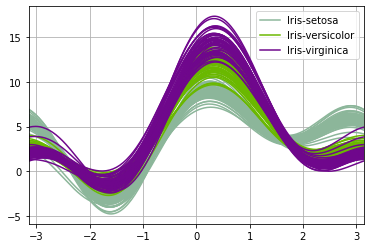

In [35]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these.
from pandas.plotting import andrews_curves
andrews_curves(data, "Classification")

##### LABEL ENCODING

In [36]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [37]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [38]:
# CALLING THE LIBRARY
from sklearn.preprocessing  import LabelEncoder 

In [39]:
# CREATING THE INSTANCE
label_encoder = LabelEncoder()

In [40]:
# FITTING THE TRANSFORM
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [41]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


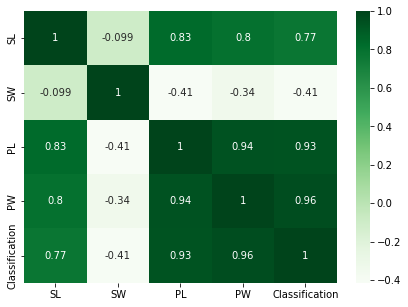

In [42]:
# Plotting the heatmap to check the correlation.
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.show()

###### MACHINE LEARNING MODEL

In [43]:
# Seperating the data into dependent and independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 3. Find out which classification model gives the best result (also do random forest algorithm)

## CLASSIFICATION MODELS

###     MODEL 1 -- LOGISTIC REGRESSION MODEL

In [44]:
#importing the libraries for logistic regression
from sklearn.linear_model import LogisticRegression

In [45]:
# Implementing Logistic Regression Model

In [46]:
# Instantiate learning model
logit_model = LogisticRegression()
# Fitting the model
logit_model = logit_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred_logit= logit_model.predict(X_test)

In [47]:
#EVALUATING PREDICTIONS

In [48]:
# Summary of the predictions made by the classifier
print("\n")
print(classification_report(y_test, y_pred_logit))
print("\n")

# Confusion Matrix
print('Confusion Matrix is :\n\n',confusion_matrix(y_test, y_pred_logit))
print("\n")

# Accuracy score
print('Accuracy Score is : ',accuracy_score(y_pred_logit,y_test))
print("\n")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix is :

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score is :  1.0







### MODEL 2 --  K-NEAREST NEIGHNORS (kNN)

In [49]:
#importing the libraries for kNN 
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# Implementing kNN Model

In [51]:
metric_k=[]
neighbors= range(3,15)

for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier= classifier.fit(X_train,y_train)
    y_pred_kNN= classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

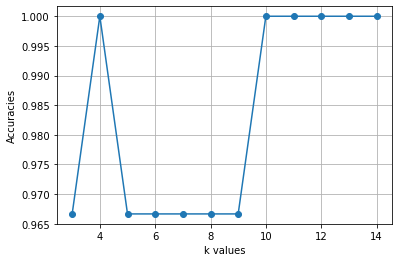

In [52]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [53]:
# Instantiate learning model
classifier= KNeighborsClassifier(n_neighbors=5)
# Fitting the model
classifier= classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred_kNN= classifier.predict(X_test)

In [54]:
#EVALUATING PREDICTIONS

In [55]:
# Summary of the predictions made by the classifier
print("\n")
print(classification_report(y_test, y_pred_kNN))
print("\n")

# Confusion Matrix
print('Confusion Matrix is :\n\n',confusion_matrix(y_test, y_pred_kNN))
print("\n")

# Accuracy score
print('Accuracy Score is : ',accuracy_score(y_pred_kNN,y_test))
print("\n")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Confusion Matrix is :

 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Accuracy Score is :  0.9666666666666667




### MODEL 3  ---  SUPPORT VECTOR MACHINES (SVM)

In [56]:
# importing the libraries for Support Vector Machine's Model
from sklearn.svm import SVC

In [57]:
# Implementing Support Vector Machine's Model

In [58]:
# Instantiate learning model
svm_clf = SVC(kernel = 'linear')
# Fitting the model
svm_clf = svm_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_svm = svm_clf.predict(X_test)

In [59]:
#EVALUATING PREDICTIONS

In [60]:
# Summary of the predictions made by the classifier
print("\n")
print(classification_report(y_test, y_pred_svm))
print("\n")

# Confusion Matrix
print('Confusion Matrix is :\n\n',confusion_matrix(y_test, y_pred_svm))
print("\n")

# Accuracy score
print('Accuracy Score is : ',accuracy_score(y_pred_svm,y_test))
print("\n")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix is :

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score is :  1.0




In [61]:
# Instantiate learning model
svm_clf2 = SVC(kernel = 'rbf')
# Fitting the model
svm_clf2 = svm_clf2.fit(X_train, y_train)
# Predicting the Test set results
y_pred_svm2 = svm_clf2.predict(X_test)

In [62]:
#EVALUATING PREDICTIONS

In [63]:
# Summary of the predictions made by the classifier
print("\n")
print(classification_report(y_test, y_pred_svm2))
print("\n")

# Confusion Matrix
print('Confusion Matrix is :\n\n',confusion_matrix(y_test, y_pred_svm2))
print("\n")

# Accuracy score
print('Accuracy Score is : ',accuracy_score(y_pred_svm2,y_test))
print("\n")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix is :

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score is :  1.0




### MODEL 4  ---  DECISION TREE

In [64]:
#  importing the libraries for Decision Tree's Model
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Implementing Decision Tree's Model

In [66]:
# Instantiate learning model
dt_clf = DecisionTreeClassifier()
# Fitting the model
dt_clf = dt_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_dt = dt_clf.predict(X_test)

In [67]:
#EVALUATING PREDICTIONS

In [68]:
# Summary of the predictions made by the classifier
print("\n")
print(classification_report(y_test, y_pred_dt))
print("\n")

# Confusion Matrix
print('Confusion Matrix is :\n\n',confusion_matrix(y_test, y_pred_dt))
print("\n")

# Accuracy score
print('Accuracy Score is : ',accuracy_score(y_pred_dt,y_test))
print("\n")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix is :

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score is :  1.0




### MODEL 5 ---  RANDOM FOREST

In [69]:
# importing the libraries for Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Implementing Random Forest's Model

In [71]:
# Instantiate learning model
rf_clf = RandomForestClassifier()
# Fitting the model
rf_clf = rf_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_rf = rf_clf.predict(X_test)

In [72]:
#EVALUATING PREDICTIONS

In [73]:
# Summary of the predictions made by the classifier
print("\n")
print(classification_report(y_test, y_pred_rf ))
print("\n")

# Confusion Matrix
print('Confusion Matrix is :\n\n',confusion_matrix(y_test, y_pred_rf ))
print("\n")

# Accuracy score
print('Accuracy Score is : ',accuracy_score(y_pred_rf ,y_test))
print("\n")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix is :

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score is :  1.0




In [74]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=8),
    SVC(),
    DecisionTreeClassifier(),               
    RandomForestClassifier()
               ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy Score is : {:.2%}".format(acc))
    
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)
    print("\n")

LogisticRegression
****Results****
Accuracy Score is : 100.00%


KNeighborsClassifier
****Results****
Accuracy Score is : 96.67%


SVC
****Results****
Accuracy Score is : 100.00%


DecisionTreeClassifier
****Results****
Accuracy Score is : 100.00%


RandomForestClassifier
****Results****
Accuracy Score is : 100.00%




C:\Users\athir\AppData\Local\Temp\ipykernel_6852\1685648242.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\athir\AppData\Local\Temp\ipykernel_6852\1685648242.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\athir\AppData\Local\Temp\ipykernel_6852\1685648242.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\athir\AppData\Local\Temp\ipykernel_6852\1685648242.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\athir\AppData\Local\Temp\ipykernel_6852\1685648242.py:28: FutureWarning

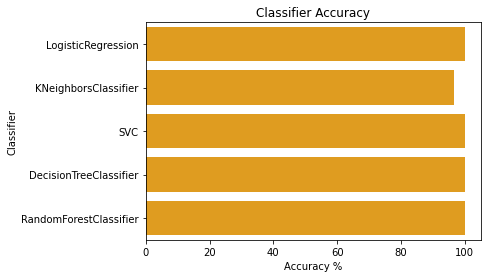

In [75]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="orange")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

### From this we understand that all the classification models(LOGISTIC REGRESSION MODEL , SVM , DECISION TREE, RANDOM FOREST) except kNN model gives 100% accuracy score for the model. For kNN Model, we are getting low accuracy score ie, 96.67% when compared with other models.